In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud

<h1>EDA</h1>

In [66]:
# Cargamos los archivos CSV producidos en la etapa de ETL:
reviews_df = pd.read_csv(r"../Archivos Producidos/reviews.csv")
games_df = pd.read_csv(r"../Archivos Producidos/games.csv")
users_df = pd.read_csv(r"../Archivos Producidos/users.csv")

# Cargamos también las reviews textuales:
text_reviews_df = pd.read_csv(r"../Archivos Producidos/text_reviews.csv")
text_reviews_df["review"] = text_reviews_df["review"].astype("str") # Convertimos la columna a tipo "str"

# Convertimos las columnas "item_id" y "year" del DataFrame "reviews_df", en tipo de dato "Int64":
reviews_df["item_id"] = reviews_df["item_id"].astype("Int64")
reviews_df["year"] = reviews_df["year"].astype("Int64")

Mapa de correlaciones del DataFrame de reviews:

In [6]:
# Extraemos la columna "user_id" ya que no es numérica:
df_num_reviews = reviews_df.drop(columns="user_id")

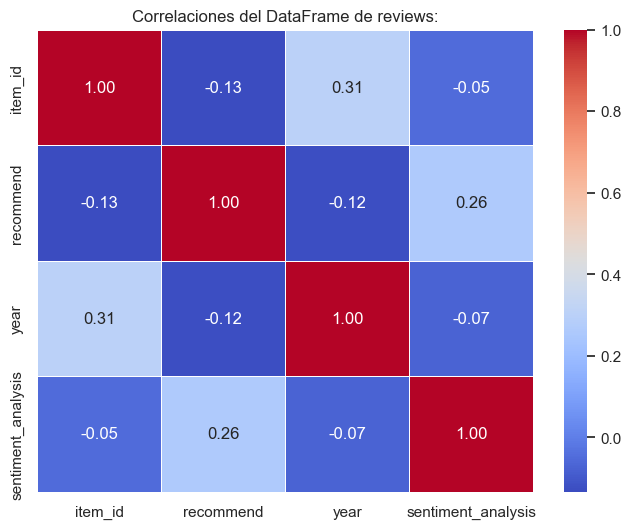

In [14]:
# Calculamos la matriz de correlación:
correlation_matrix = df_num_reviews.corr()

# Configuramos el mapa de correlaciones con seaborn:
sns.set(style="white")
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlaciones del DataFrame de reviews:")

plt.show()

Distribución de Sentimientos por Juego (Top 25):

In [26]:
# Creamos un nuevo DataFrame de "reviews" en el cual se reemplaza la columna "item_id" por "app_name":
df_reviews_nombre = pd.merge(games_df[["app_name", "item_id"]], df_num_reviews, on="item_id").drop(columns="item_id")

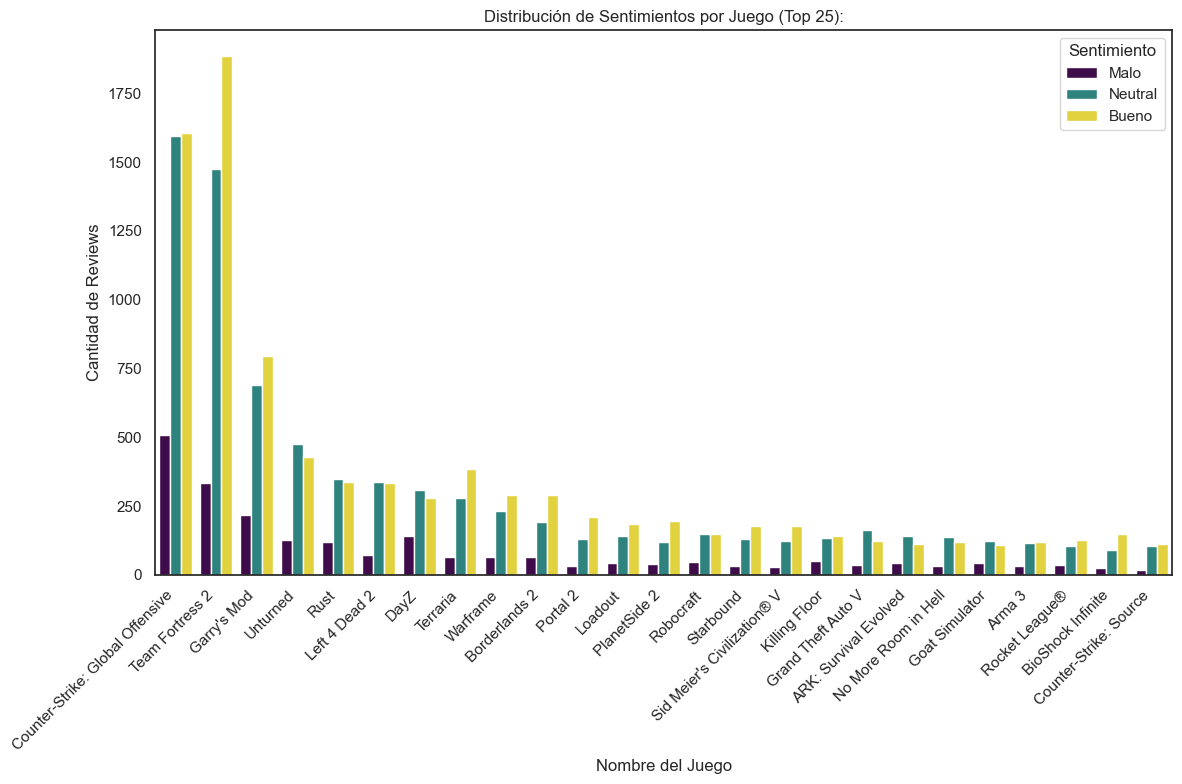

In [42]:
# Agrupamos por juego y sentimiento, y contamos la cantidad de reviews:
df_rn_grouped = df_reviews_nombre.groupby(["app_name", "sentiment_analysis"]).size().unstack(fill_value=0)

# Seleccionamos los primeros 25 juegos con más revisiones:
top_n_games = df_rn_grouped.sum(axis=1).nlargest(25).index
df_top_n = df_reviews_nombre[df_reviews_nombre["app_name"].isin(top_n_games)]

# Creamos un gráfico de barras apiladas:
plt.figure(figsize=(12, 8))
sns.countplot(x="app_name", hue="sentiment_analysis", data=df_top_n, palette="viridis", order=top_n_games)
plt.title("Distribución de Sentimientos por Juego (Top 25):")
plt.xlabel("Nombre del Juego")
plt.ylabel("Cantidad de Reviews")
plt.legend(title="Sentimiento", loc="upper right", labels=["Malo", "Neutral", "Bueno"])
plt.xticks(rotation=45, ha="right")  # Ajustamos la rotación de los nombres de los juegos
plt.tight_layout()

plt.show()

Top 20 juegos más jugados:

In [43]:
# Creamos un nuevo DataFrame de "users" en el cual se reemplaza la columna "item_id" por "app_name":
df_users_nombre = pd.merge(games_df[["app_name", "item_id"]], users_df, on="item_id").drop(columns="item_id")

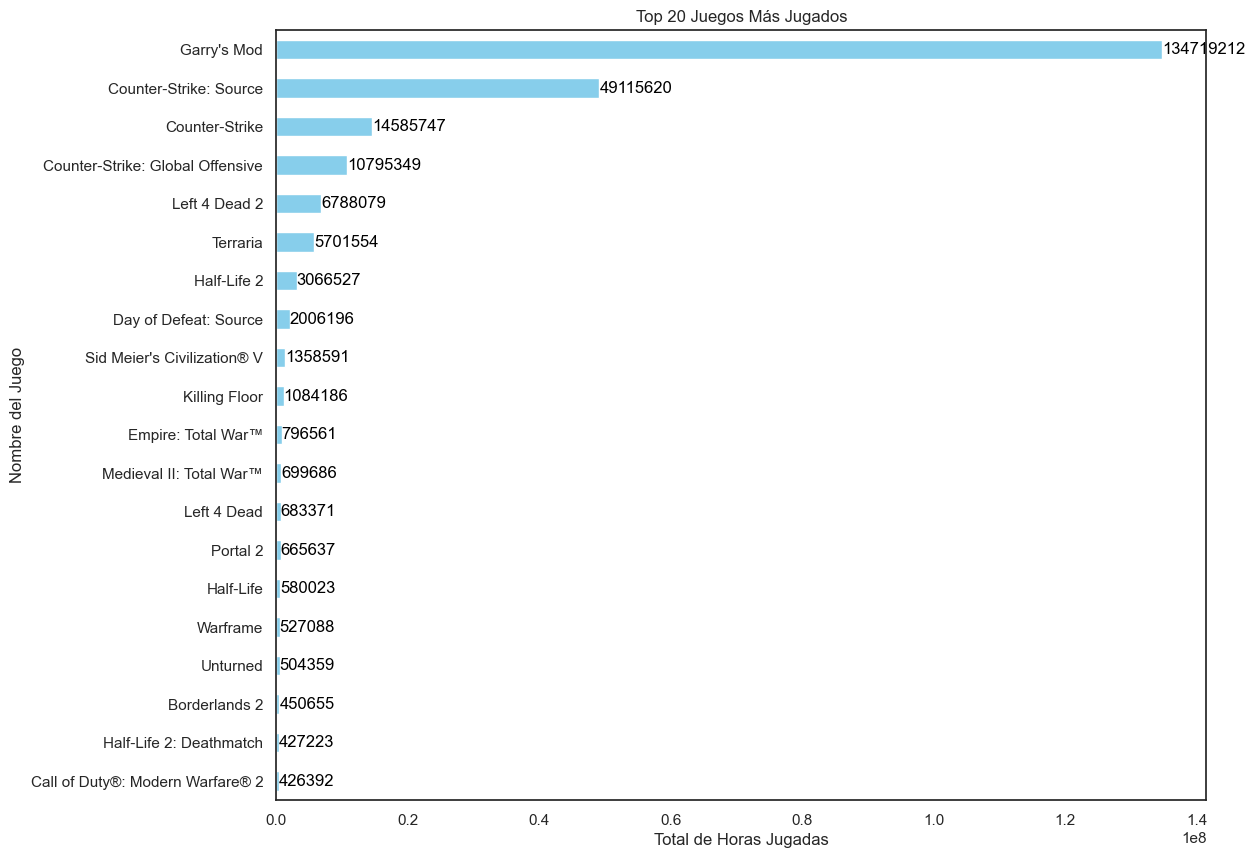

In [53]:
# Calculamos la suma total de tiempo jugado por juego:
total_playtime_por_juego = df_users_nombre.groupby("app_name")["playtime"].sum()

# Ordenamos los juegos de mayor a menor tiempo jugado y tomamos los top 20:
top_20_juegos_mas_jugados = total_playtime_por_juego.sort_values(ascending=False).head(20)

# Invertimos el orden para que el juego más jugado esté en la parte superior:
top_20_juegos_mas_jugados = top_20_juegos_mas_jugados.iloc[::-1]

# Gráfico para los juegos más jugados:
plt.figure(figsize=(12, 10))
ax = top_20_juegos_mas_jugados.plot(kind="barh", color="skyblue")
plt.title("Top 20 Juegos Más Jugados")
plt.xlabel("Total de Horas Jugadas")
plt.ylabel("Nombre del Juego")

# Etiquetas de datos (cantidad total de horas) en las barras:
for i, v in enumerate(top_20_juegos_mas_jugados):
    ax.text(v + 1, i, str(v), color='black', va='center')

plt.show()


Los juegos que no han sido jugados:

In [59]:
# Filtramos los juegos con playtime total igual a 0:
juegos_con_playtime_0 = total_playtime_por_juego[total_playtime_por_juego == 0]

# Imprimimos la lista de juegos con playtime total igual a 0:
print("Juegos con playtime total igual a 0:")
for juego in juegos_con_playtime_0.index:
    print(f"- {juego}")

Juegos con playtime total igual a 0:
- A.R.E.S.: Extinction Agenda
- ARK: Survival Of The Fittest
- Agarest: Generations of War
- Alien: Isolation
- Alpha Protocol™
- ArcheAge
- BIT.TRIP BEAT
- Bionic Commando
- Bionic Commando: Rearmed
- Boring Man - Online Tactical Stickman Combat
- Chains
- Cold Fear™
- Coma: Mortuary
- Commandos: Behind Enemy Lines
- Containment: The Zombie Puzzler
- Continent of the Ninth Seal
- DeathSpank
- Divinity: Original Sin 2
- Dungeon-Party
- Echelon: Wind Warriors
- Everquest ®
- Fallen Enchantress: Legendary Heroes
- Freedom Force
- Galactic Arms Race
- Galactic Civilizations® II: Ultimate Edition
- Game of Thrones - A Telltale Games Series
- Gratuitous Space Battles
- Greed: Black Border
- Guardians of Graxia
- Gumboy - Crazy Adventures™
- Guns and Robots
- Hacker Evolution: Untold
- Half-Life 2: Update
- Hammerfight
- Heroine's Quest: The Herald of Ragnarok
- Indiana Jones® and the Fate of Atlantis™
- Infinity Wars: Animated Trading Card Game
- Insurge

Nube de palabras más frecuentes en las reviews:

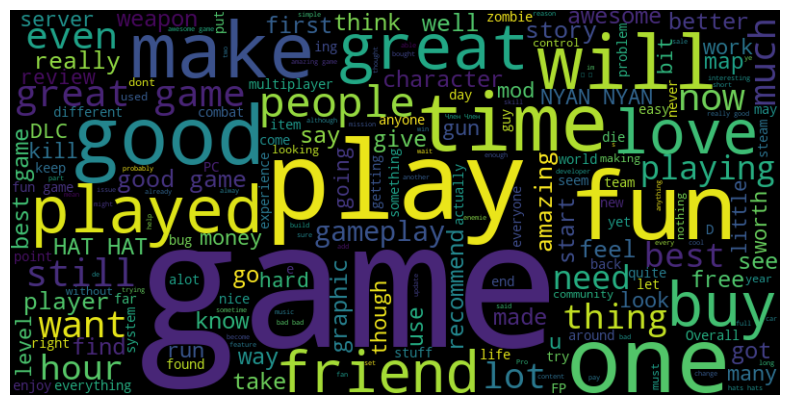

In [73]:
# Concatenamos el texto de todas las filas en una sola cadena:
text = " ".join(text_reviews_df["review"])

# Creamos la nube de palabras:
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()